In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#df=pd.read_excel('Data-Wind_turbine_diagnosis.xlsx',sheet_name='Data',parse_dates=['DateTime'])
df=pd.read_excel('Data-Wind_turbine_diagnosis.xlsx',sheet_name='Data')

In [3]:
df.head()

,DateTime,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
0,2015-05-07 12:10:00,0.000,10.304991,0.029475,0.000000,0.000000,28.100000,33.074312,30.020161,27.798381,...,69.054955,62.360009,3202.919722,3.698,84.324204,1.134000,120.400002,90.019997,90.000000,90.000000
1,2015-05-07 13:10:00,0.000,12.114834,0.039450,2.561702,0.008035,27.790823,32.318149,29.200001,28.711891,...,67.185126,61.592758,3202.920226,-0.185,85.358294,1.130000,120.400002,90.023830,90.000000,90.000000
2,2015-05-07 13:30:00,0.000,11.625033,0.049417,4.439519,2.413139,27.613112,32.154716,30.962003,28.204204,...,68.469464,66.045056,3202.924190,9.967,64.572482,1.130771,122.179998,90.027696,90.000000,90.000000
3,2015-05-07 13:40:00,0.000,10.197867,0.040475,13.661278,3.918215,27.479778,32.073000,34.325259,28.500908,...,68.846883,67.977519,3202.926217,2.653,-1.415134,1.134517,187.350099,86.697537,86.682875,86.685850
4,2015-05-07 13:50:00,1.645,10.796599,0.020867,172.699256,5.816421,27.346445,32.650275,33.705851,29.147533,...,62.804022,69.092141,3202.928243,-5.745,-6.674765,1.135730,181.369652,64.796145,64.799131,64.800898


In [3]:
df.set_index('DateTime',inplace=True)

In [5]:
df.describe()

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
count,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,...,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000,30683.000000
mean,728.566346,6.633183,-0.276776,813.482058,10.667141,15.438503,39.811843,33.754864,28.120290,36.632271,...,68.948755,64.008211,3381.128296,3.232724,-0.316564,0.853071,179.468327,7.357917,7.313856,7.306653
std,739.956127,57.198866,57.083401,293.503063,57.269949,57.761426,57.562619,57.947604,57.695726,57.427718,...,57.747087,57.497177,123.977615,4.847896,57.418161,57.089857,59.901894,59.865675,59.870931,59.870011
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-19.917000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,140.533285,4.765845,0.030500,757.195729,10.203488,9.603722,36.299999,27.971708,23.799999,33.897469,...,64.700764,62.367603,3295.140226,0.226500,-1.802188,1.151646,173.535208,1.343809,1.209373,1.207772
50%,476.985874,6.635502,0.048917,827.307082,11.323380,17.747648,39.925983,33.950546,29.343783,36.682487,...,68.154033,64.097872,3392.970338,3.329000,0.020833,1.169000,179.821189,1.714820,1.710973,1.710882
75%,1104.149834,8.697716,0.069679,1012.204725,13.551971,22.200001,43.784821,40.349166,33.847393,39.623796,...,73.340221,66.374173,3474.548536,6.311500,1.873021,1.204292,186.135311,2.686377,2.606304,2.606697
max,2591.780833,21.897778,0.188050,1137.727662,16.179534,32.077961,62.367368,60.294329,45.299999,48.685072,...,86.619364,71.491217,3518.528649,19.985000,162.680417,1.307054,359.899994,97.137982,97.135832,97.130423


In [6]:
df=df[df['Active.Power']>=0]

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-11-03 13:30:00,-0.058837,3.312479,0.0,67.97857,4.935417,20.212312,29.326953,30.553223,25.099576,39.304684,...,68.979487,63.96789,3474.049779,-16.025,-22.456917,1.160346,164.856824,38.46464,38.673708,38.517276
2015-12-28 12:20:00,-9999.000000,-9999.000000,-9999.0,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.00000,-9999.000000,3.791,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000


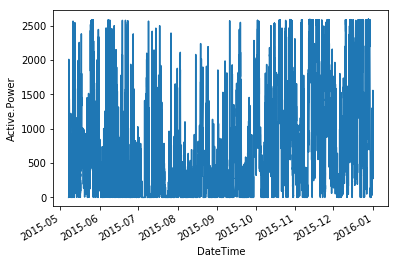

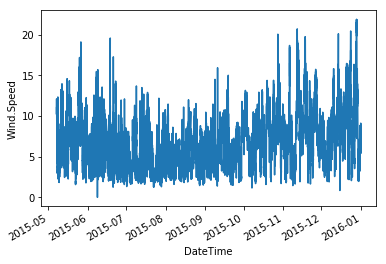

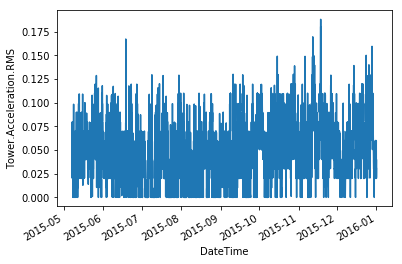

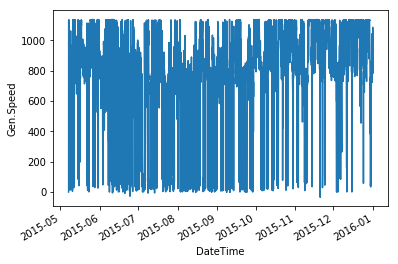

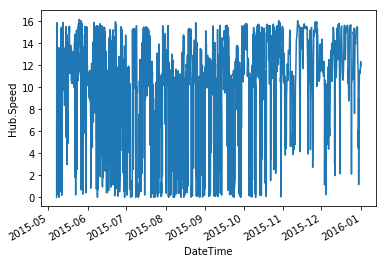

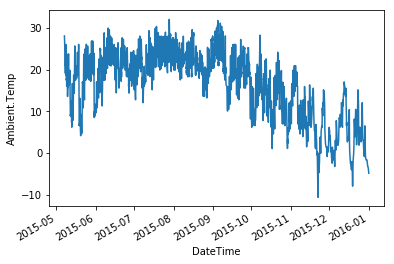

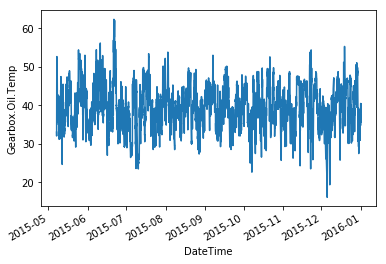

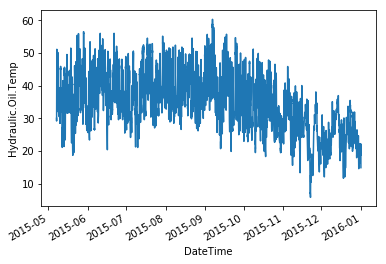

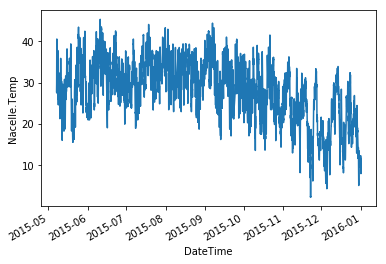

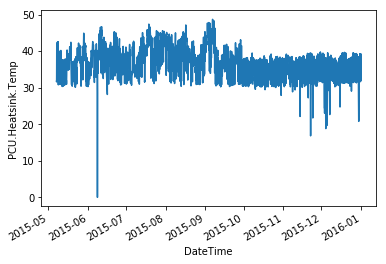

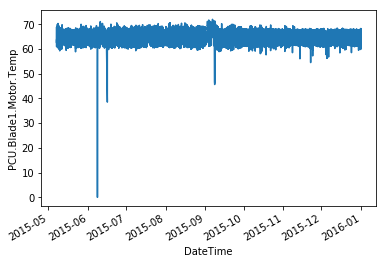

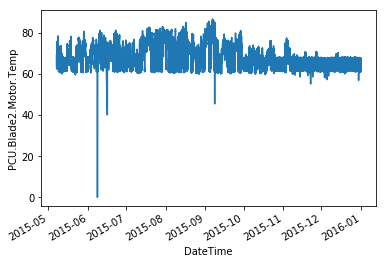

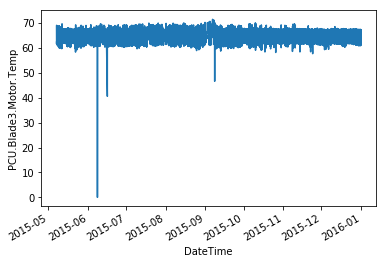

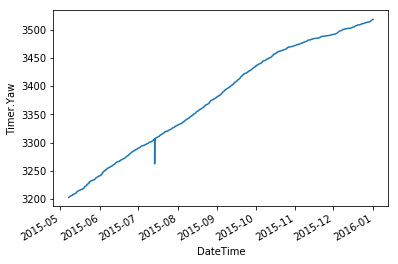

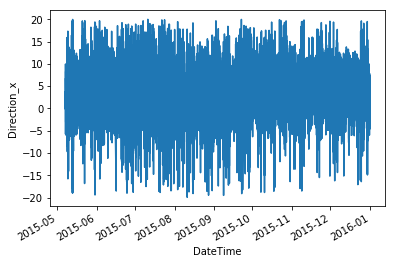

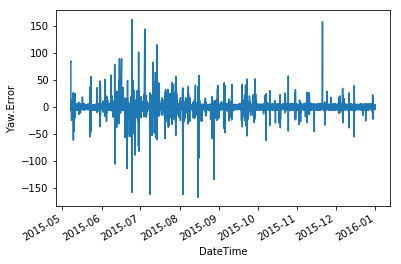

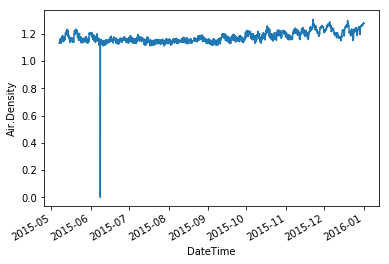

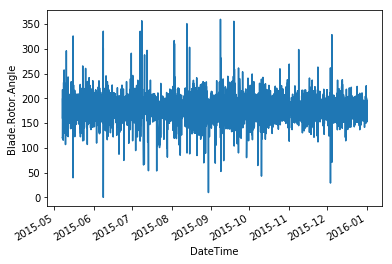

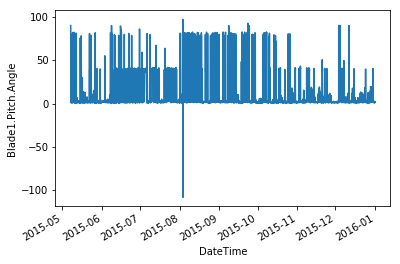

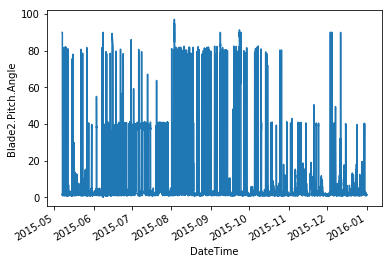

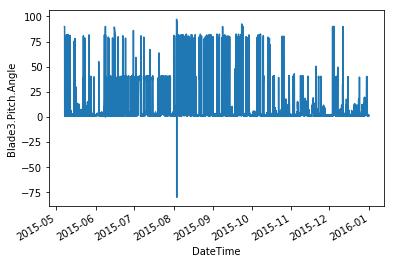

In [10]:
for i in df.columns:
    df[i].plot()
    plt.ylabel(i)
    plt.show()

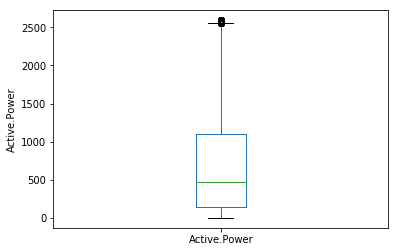

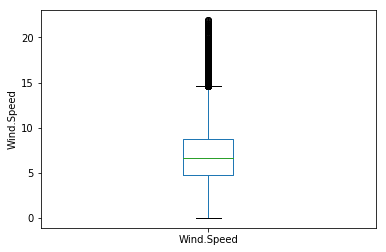

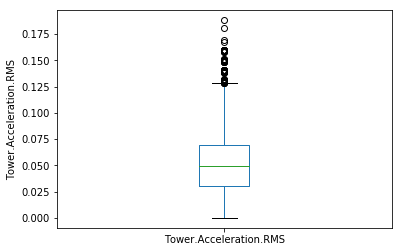

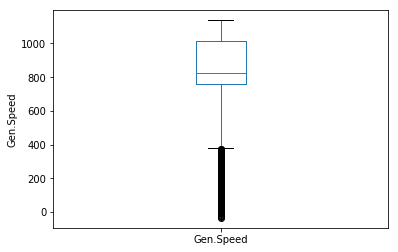

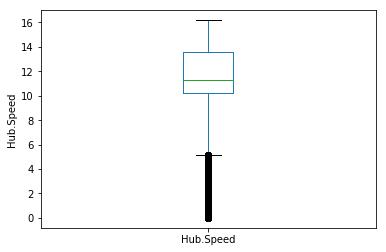

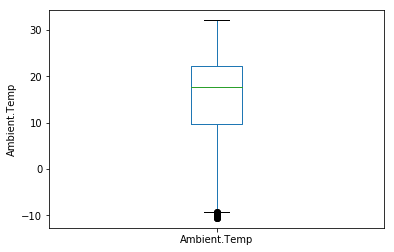

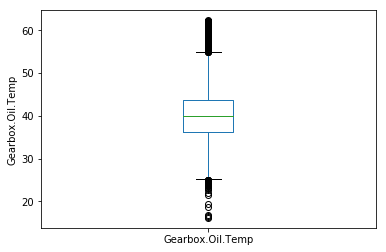

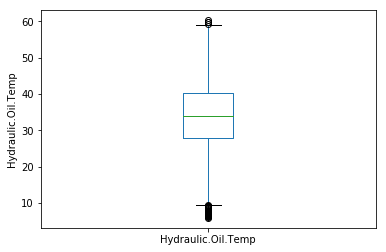

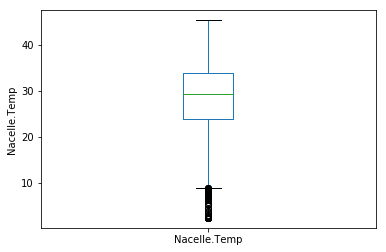

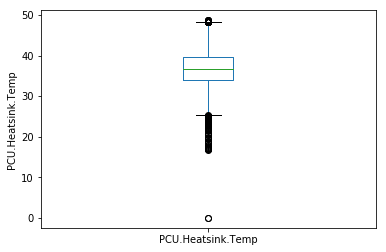

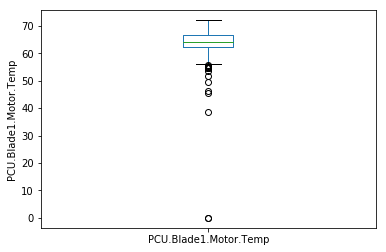

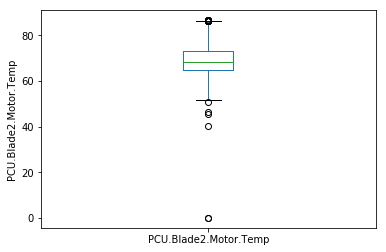

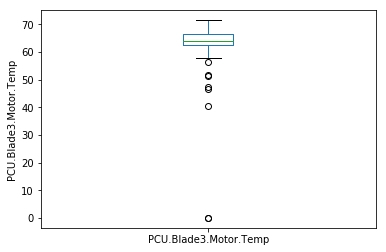

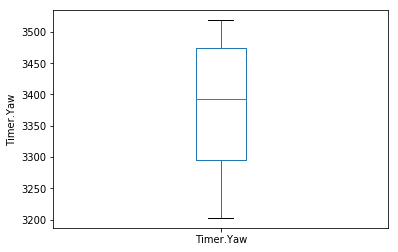

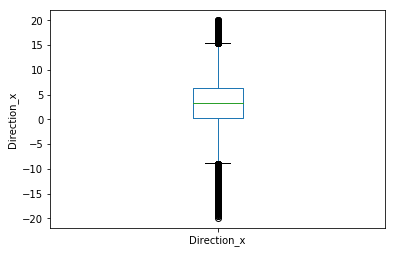

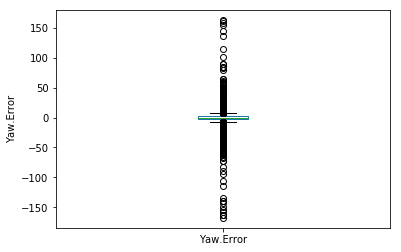

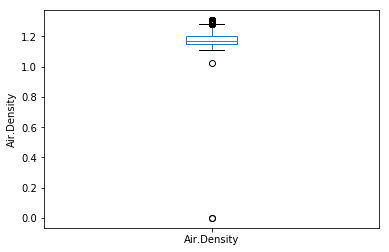

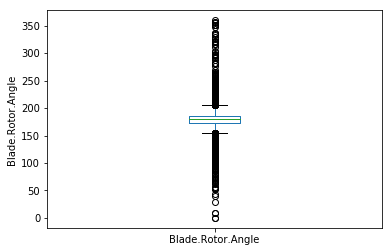

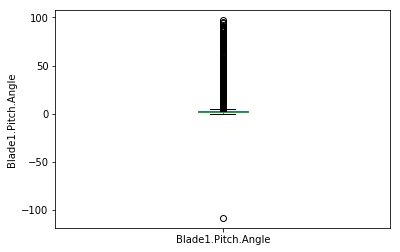

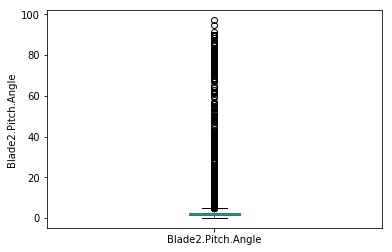

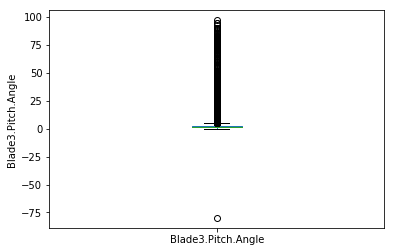

In [15]:
for i in df.columns:
    df[i].plot(kind='box')
    plt.ylabel(i)
    plt.show()

In [85]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(3)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,PCU.Blade1.Motor.Temp,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle,Year,Month,day,hour
Active.Power,1,0.936,0.737,0.731,0.72,-0.312,0.677,-0.0969,0.0147,-0.216,-0.0113,-0.232,-0.00135,0.311,0.233,0.00363,0.22,0.0214,-0.257,-0.258,-0.258,nan,0.314,0.114,0.018
Wind.Speed,0.936,1,0.732,0.728,0.726,-0.268,0.683,-0.0646,0.0416,-0.172,-0.00784,-0.182,-0.000896,0.261,0.223,0.0174,0.179,0.0269,-0.236,-0.237,-0.237,nan,0.267,0.0844,0.024
Tower.Acceleration.RMS,0.737,0.732,1,0.735,0.737,-0.24,0.569,0.0125,0.0756,-0.0966,-0.0582,-0.0816,-0.0549,0.196,0.274,0.011,0.17,0.0285,-0.44,-0.441,-0.441,nan,0.191,0.113,-0.0298
Gen.Speed,0.731,0.728,0.735,1,0.953,-0.264,0.623,-0.0148,0.108,0.0562,-0.0597,0.0308,-0.0513,0.196,0.266,0.0159,0.206,0.0507,-0.794,-0.796,-0.795,nan,0.204,0.0588,0.0179
Hub.Speed,0.72,0.726,0.737,0.953,1,-0.246,0.638,0.00964,0.127,0.0404,-0.067,0.0257,-0.0553,0.175,0.26,0.0142,0.187,0.0462,-0.737,-0.739,-0.738,nan,0.179,0.0759,0.0196
Ambient.Temp,-0.312,-0.268,-0.24,-0.264,-0.246,1,0.194,0.848,0.902,0.583,0.0377,0.704,0.0043,-0.613,-0.107,0.00291,-0.948,-0.0134,0.127,0.128,0.128,nan,-0.64,-0.118,0.134
Gearbox.Oil.Temp,0.677,0.683,0.569,0.623,0.638,0.194,1,0.396,0.53,0.289,-0.00224,0.277,-0.00931,-0.0443,0.17,0.00472,-0.25,0.0234,-0.287,-0.288,-0.287,nan,-0.0492,0.0636,0.0954
Hydraulic.Oil.Temp,-0.0969,-0.0646,0.0125,-0.0148,0.00964,0.848,0.396,1,0.908,0.537,0.046,0.661,0.015,-0.498,-0.0346,-0.00526,-0.815,-0.00303,-0.0267,-0.0261,-0.0259,nan,-0.522,-0.0882,0.258
Nacelle.Temp,0.0147,0.0416,0.0756,0.108,0.127,0.902,0.53,0.908,1,0.593,0.0198,0.711,-0.00812,-0.496,-0.00669,0.00674,-0.881,0.00217,-0.123,-0.123,-0.123,nan,-0.522,-0.091,0.164
PCU.Heatsink.Temp,-0.216,-0.172,-0.0966,0.0562,0.0404,0.583,0.289,0.537,0.593,1,0.109,0.82,0.0639,-0.377,-0.043,0.00477,-0.522,0.0152,-0.239,-0.239,-0.239,nan,-0.374,-0.0341,0.101


In [52]:
#sns.set(style='ticks',color_codes=True)
sns.pairplot(df)


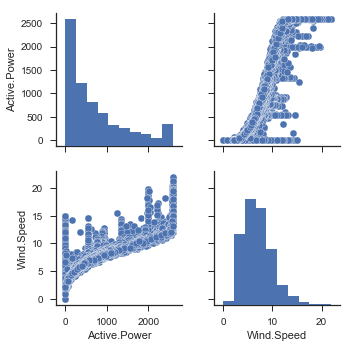

In [83]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(df,vars=['Active.Power','Wind.Speed'])

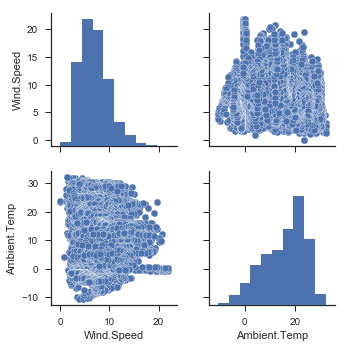

In [84]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(df,vars=['Wind.Speed','Ambient.Temp'])

In [12]:
df.index.name

'DateTime'

In [53]:
df.columns

Index(['DateTime', 'Active.Power', 'Wind.Speed', 'Tower.Acceleration.RMS',
       'Gen.Speed', 'Hub.Speed', 'Ambient.Temp', 'Gearbox.Oil.Temp',
       'Hydraulic.Oil.Temp', 'Nacelle.Temp', 'PCU.Heatsink.Temp',
       'PCU.Blade1.Motor.Temp', 'PCU.Blade2.Motor.Temp',
       'PCU.Blade3.Motor.Temp', 'Timer.Yaw', 'Direction_x', 'Yaw.Error',
       'Air.Density', 'Blade.Rotor.Angle', 'Blade1.Pitch.Angle',
       'Blade2.Pitch.Angle', 'Blade3.Pitch.Angle'],
      dtype='object')

In [14]:
#sns.pairplot(data=df,
#             y_vars=['Wind.Speed', 'Tower.Acceleration.RMS','Gen.Speed', 'Hub.Speed', 'Ambient.Temp', 'Gearbox.Oil.Temp',
#       'Hydraulic.Oil.Temp', 'Nacelle.Temp', 'PCU.Heatsink.Temp',
#       'PCU.Blade1.Motor.Temp', 'PCU.Blade2.Motor.Temp',
#       'PCU.Blade3.Motor.Temp', 'Timer.Yaw', 'Direction_x', 'Yaw.Error',
#       'Air.Density', 'Blade.Rotor.Angle', 'Blade1.Pitch.Angle',
#       'Blade2.Pitch.Angle', 'Blade3.Pitch.Angle'],
#            x_vars=['Active.Power'])

In [39]:
#df.head()

In [40]:
df['Date']=df['DateTime'].dt.date
df['Time']=df['DateTime'].dt.time

In [45]:
df['Date'].head()

0    2015-05-07
1    2015-05-07
2    2015-05-07
3    2015-05-07
4    2015-05-07
Name: Date, dtype: object

In [46]:
df['Year']=df['DateTime'].dt.year

In [47]:
df['Month']=df['DateTime'].dt.month
df['Day']=df['DateTime'].dt.day

In [48]:
df.head()

,DateTime,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,...,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle,Date,Time,Year,Month,Day
0,2015-05-07 12:10:00,0.000,10.304991,0.029475,0.000000,0.000000,28.100000,33.074312,30.020161,27.798381,...,1.134000,120.400002,90.019997,90.000000,90.000000,2015-05-07,12:10:00,2015,5,7
1,2015-05-07 13:10:00,0.000,12.114834,0.039450,2.561702,0.008035,27.790823,32.318149,29.200001,28.711891,...,1.130000,120.400002,90.023830,90.000000,90.000000,2015-05-07,13:10:00,2015,5,7
2,2015-05-07 13:30:00,0.000,11.625033,0.049417,4.439519,2.413139,27.613112,32.154716,30.962003,28.204204,...,1.130771,122.179998,90.027696,90.000000,90.000000,2015-05-07,13:30:00,2015,5,7
3,2015-05-07 13:40:00,0.000,10.197867,0.040475,13.661278,3.918215,27.479778,32.073000,34.325259,28.500908,...,1.134517,187.350099,86.697537,86.682875,86.685850,2015-05-07,13:40:00,2015,5,7
4,2015-05-07 13:50:00,1.645,10.796599,0.020867,172.699256,5.816421,27.346445,32.650275,33.705851,29.147533,...,1.135730,181.369652,64.796145,64.799131,64.800898,2015-05-07,13:50:00,2015,5,7


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30683 entries, 0 to 30682
Data columns (total 27 columns):
DateTime                  30683 non-null datetime64[ns]
Active.Power              30683 non-null float64
Wind.Speed                30683 non-null float64
Tower.Acceleration.RMS    30683 non-null float64
Gen.Speed                 30683 non-null float64
Hub.Speed                 30683 non-null float64
Ambient.Temp              30683 non-null float64
Gearbox.Oil.Temp          30683 non-null float64
Hydraulic.Oil.Temp        30683 non-null float64
Nacelle.Temp              30683 non-null float64
PCU.Heatsink.Temp         30683 non-null float64
PCU.Blade1.Motor.Temp     30683 non-null float64
PCU.Blade2.Motor.Temp     30683 non-null float64
PCU.Blade3.Motor.Temp     30683 non-null float64
Timer.Yaw                 30683 non-null float64
Direction_x               30683 non-null float64
Yaw.Error                 30683 non-null float64
Air.Density               30683 non-null float64
Bl

In [28]:
df[df['Active.Power']>0].describe()

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
count,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,...,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000,30681.000000
mean,728.939743,6.959410,0.049108,813.858773,10.993577,15.764752,40.139385,34.081970,28.447207,36.959279,...,69.276903,64.336200,3381.561372,3.233334,0.010049,1.178991,179.800554,7.683045,7.638975,7.631775
std,737.429536,2.948062,0.027097,286.915995,3.767733,8.223205,5.362622,8.786145,7.193798,3.915158,...,5.562163,2.318845,97.650679,4.846806,6.192195,0.037544,14.543765,17.899636,17.917998,17.915063
min,0.000000,0.000000,0.000000,-35.110603,0.000000,-10.579712,16.137703,5.852604,2.300000,0.000000,...,0.000000,0.000000,3202.919722,-19.917000,-167.730110,0.000000,0.000000,-108.292490,0.000000,-79.879598
25%,140.584405,4.766168,0.030500,757.217237,10.203766,9.605196,36.299999,27.972168,23.799999,33.898191,...,64.700992,62.367644,3295.168911,0.227000,-1.802083,1.151646,173.536500,1.343826,1.209391,1.207832
50%,476.987357,6.635754,0.048926,827.327679,11.323497,17.747648,39.926650,33.951040,29.346342,36.682487,...,68.154033,64.098037,3392.970338,3.329000,0.021107,1.169000,179.821667,1.714820,1.710973,1.710882
75%,1104.152167,8.698196,0.069683,1012.208755,13.552270,22.200001,43.785055,40.349254,33.848108,39.624107,...,73.340665,66.374208,3474.549086,6.312000,1.873125,1.204297,186.136250,2.686257,2.606250,2.606533
max,2591.780833,21.897778,0.188050,1137.727662,16.179534,32.077961,62.367368,60.294329,45.299999,48.685072,...,86.619364,71.491217,3518.528649,19.985000,162.680417,1.307054,359.899994,97.137982,97.135832,97.130423


In [26]:
df.set_index('DateTime',inplace=True)

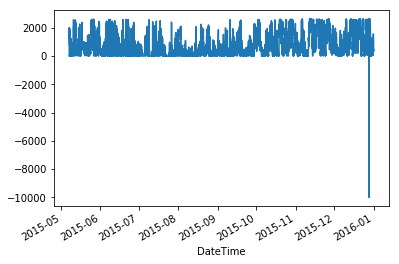

In [27]:
df['Active.Power'].plot()

In [29]:
df[df['Active.Power']<0].head()

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle,Date,Time
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-11-03 13:30:00,-0.058837,3.312479,0.0,67.97857,4.935417,20.212312,29.326953,30.553223,25.099576,39.304684,...,3474.049779,-16.025,-22.456917,1.160346,164.856824,38.46464,38.673708,38.517276,2015-11-03,13:30:00
2015-12-28 12:20:00,-9999.000000,-9999.000000,-9999.0,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,3.791,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,2015-12-28,12:20:00


In [30]:
df=df[df['Active.Power']>=0]

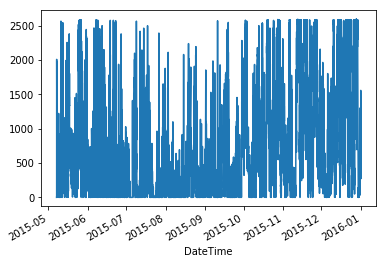

In [31]:
df['Active.Power'].plot()

In [17]:
#df.corr().style.set_precision(3)

In [4]:
cor=df.corr().abs()['Active.Power'].sort_values(ascending=False)

In [8]:
id=cor.index[0:2]

In [9]:
id

Index(['Active.Power', 'Gen.Speed'], dtype='object')

In [11]:
df[id].head()

,Active.Power,Gen.Speed
DateTime,,
2015-05-07 12:10:00,0.000,0.000000
2015-05-07 13:10:00,0.000,2.561702
2015-05-07 13:30:00,0.000,4.439519
2015-05-07 13:40:00,0.000,13.661278
2015-05-07 13:50:00,1.645,172.699256


In [49]:
columns = df1.index[1:3]

In [53]:
df[columns].dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [51]:
for i in columns:
    print(i)

Wind.Speed
Tower.Acceleration.RMS


In [54]:
df['Year']= df.index.year
df['Month']= df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour

In [55]:
df1 = df.groupby(['Year','Month','day','hour']).agg({'Active.Power':'sum', 'Wind.Speed':'mean', 'Tower.Acceleration.RMS':'mean', 'Gen.Speed':'mean',
       'Hub.Speed':'mean', 'Ambient.Temp':'mean', 'Gearbox.Oil.Temp':'mean', 'Hydraulic.Oil.Temp':'mean',
       'Nacelle.Temp':'mean', 'PCU.Heatsink.Temp':'mean', 'PCU.Blade1.Motor.Temp':'mean',
       'PCU.Blade2.Motor.Temp':'mean', 'PCU.Blade3.Motor.Temp':'mean', 'Timer.Yaw':'mean',
       'Direction_x':'mean', 'Yaw.Error':'mean', 'Air.Density':'mean', 'Blade.Rotor.Angle':'mean',
       'Blade1.Pitch.Angle':'mean', 'Blade2.Pitch.Angle':'mean', 'Blade3.Pitch.Angle':'mean'})
df1.head()

Active.Power  Wind.Speed  Tower.Acceleration.RMS  \
Year Month day hour                                                     
2015 5     7   12        0.000000   10.304991                0.029475   
               13        1.645000   11.183584                0.037552   
               14    10442.132878   10.573621                0.067940   
               15     9476.854697    9.988822                0.061882   
               16     9481.557008    9.913296                0.069822   

                       Gen.Speed  Hub.Speed  Ambient.Temp  Gearbox.Oil.Temp  \
Year Month day hour                                                           
2015 5     7   12       0.000000   0.000000     28.100000         33.074312   
               13      48.340439   3.038952     27.557539         32.299035   
               14    1106.221868  15.169157     26.934930         43.736941   
               15    1075.552011  15.649596     26.656024         49.637166   
               16    1097.139548  15.649870     27.098666         50.931888   

                     Hydraulic.Oil.Temp  Nacelle.Temp  PCU.Heatsink.Temp  \
Year Month day hour                                                        
2015 5     7   12             30.020161     27.798381          31.733492   
               13             32.048278     28.641134          32.137092   
               14             34.955392     33.991330          39.343158   
               15             43.495203     38.965024          41.003695   
               16             47.335359     39.424407          41.476872   

                            ...          PCU.Blade2.Motor.Temp  \
Year Month day hour         ...                                  
2015 5     7   12           ...                      69.054955   
               13           ...                      66.826374   
               14           ...                      70.295838   
               15           ...                      73.407959   
               16           ...                      74.188804   

                     PCU.Blade3.Motor.Temp    Timer.Yaw  Direction_x  \
Year Month day hour                                                    
2015 5     7   12                62.360009  3202.919722     3.698000   
               13                66.176869  3202.924719     1.672500   
               14                63.111569  3202.969622     3.551000   
               15                62.893926  3203.104397     4.625333   
               16                63.200152  3203.211087     4.318667   

                     Yaw.Error  Air.Density  Blade.Rotor.Angle  \
Year Month day hour                                              
2015 5     7   12    84.324204     1.134000         120.400002   
               13    35.460219     1.132755         152.824938   
               14    -0.169067     1.134645         181.643749   
               15     0.905716     1.133445         192.477364   
               16     0.204485     1.132158         185.490651   

                     Blade1.Pitch.Angle  Blade2.Pitch.Angle  \
Year Month day hour                                           
2015 5     7   12             90.019997           90.000000   
               13             82.886302           82.870501   
               14              2.044445            2.034097   
               15              1.695890            1.607039   
               16              1.490909            1.443830   

                     Blade3.Pitch.Angle  
Year Month day hour                      
2015 5     7   12             90.000000  
               13             82.871687  
               14              2.032675  
               15              1.617364  
               16              1.444129  

[5 rows x 21 columns]

In [56]:
df.index.month.unique()

Int64Index([5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='DateTime')

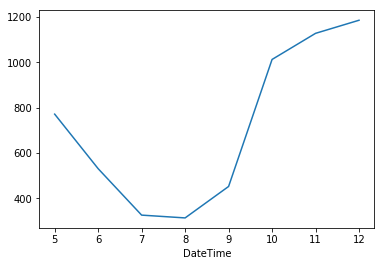

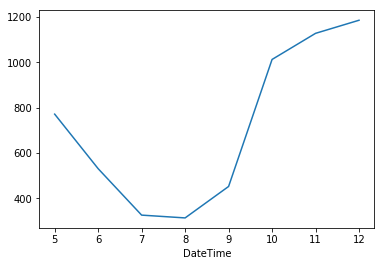

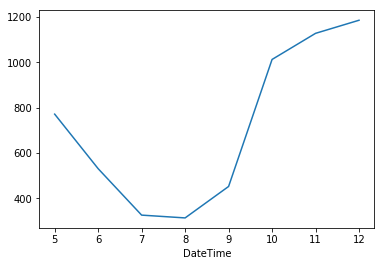

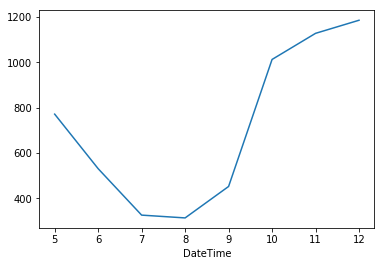

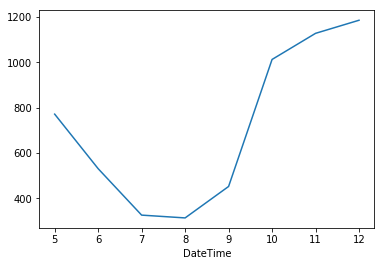

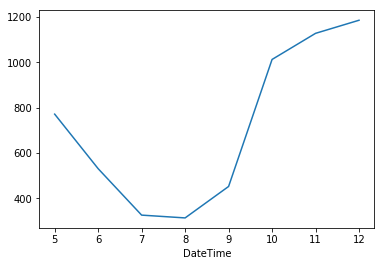

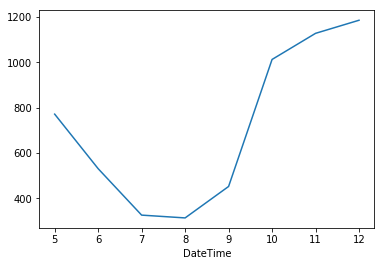

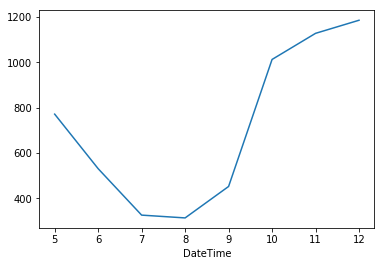

In [18]:
for i in df.index.month.unique():
    df.groupby(df.index.month)['Active.Power'].mean().plot()    
    plt.show()

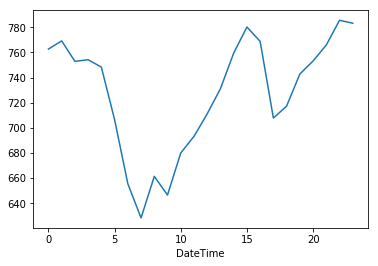

In [62]:
df.groupby(df.index.hour)['Active.Power'].mean().plot()
plt.show()

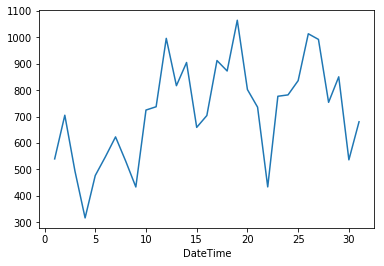

In [63]:
df.groupby(df.index.day)['Active.Power'].mean().plot()
plt.show()

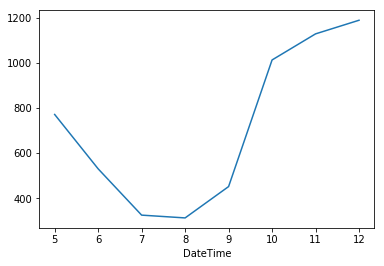

In [66]:
df.groupby(df.index.month)['Active.Power'].mean().plot()
plt.show()

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [94]:
df2=df.drop(['Year','Month','day','hour'],axis=1)

In [95]:
df2.shape

(30681, 21)

In [72]:
model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(df2.drop('Active.Power' ,axis=1), df2['Active.Power'], train_size=.8)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
model.feature_importances_

array([9.63162932e-02, 5.53841169e-05, 8.93302777e-01, 4.76914444e-05,
       8.40512418e-04, 1.12674528e-03, 2.42554286e-04, 2.38406679e-04,
       9.68900800e-05, 3.58738917e-05, 7.31853079e-05, 4.78918600e-05,
       2.16828655e-04, 3.53252038e-05, 8.90704990e-05, 9.42868345e-04,
       5.96840824e-05, 6.29778584e-04, 2.68048865e-03, 2.92175058e-03])

In [74]:
for feature in zip(X_train.columns, model.feature_importances_):
    print(feature)   

('Wind.Speed', 0.09631629319283706)
('Tower.Acceleration.RMS', 5.538411688941667e-05)
('Gen.Speed', 0.8933027768426325)
('Hub.Speed', 4.769144437027528e-05)
('Ambient.Temp', 0.0008405124179550808)
('Gearbox.Oil.Temp', 0.0011267452828034852)
('Hydraulic.Oil.Temp', 0.00024255428597377187)
('Nacelle.Temp', 0.00023840667940544687)
('PCU.Heatsink.Temp', 9.689008001216634e-05)
('PCU.Blade1.Motor.Temp', 3.5873891651263105e-05)
('PCU.Blade2.Motor.Temp', 7.318530791826791e-05)
('PCU.Blade3.Motor.Temp', 4.7891859967422976e-05)
('Timer.Yaw', 0.00021682865494152781)
('Direction_x', 3.5325203810861944e-05)
('Yaw.Error', 8.907049903565122e-05)
('Air.Density', 0.000942868344586336)
('Blade.Rotor.Angle', 5.9684082404281864e-05)
('Blade1.Pitch.Angle', 0.0006297785840827257)
('Blade2.Pitch.Angle', 0.00268048864804038)
('Blade3.Pitch.Angle', 0.002921750580682155)


In [81]:
df.drop('Active.Power',axis=1).columns

Index(['Wind.Speed', 'Tower.Acceleration.RMS', 'Gen.Speed', 'Hub.Speed',
       'Ambient.Temp', 'Gearbox.Oil.Temp', 'Hydraulic.Oil.Temp',
       'Nacelle.Temp', 'PCU.Heatsink.Temp', 'PCU.Blade1.Motor.Temp',
       'PCU.Blade2.Motor.Temp', 'PCU.Blade3.Motor.Temp', 'Timer.Yaw',
       'Direction_x', 'Yaw.Error', 'Air.Density', 'Blade.Rotor.Angle',
       'Blade1.Pitch.Angle', 'Blade2.Pitch.Angle', 'Blade3.Pitch.Angle',
       'Year', 'Month', 'day', 'hour'],
      dtype='object')

In [82]:
df_feats = pd.DataFrame()
df_feats['feats'] = df2.drop('Active.Power',axis=1).columns
df_feats['importance'] = model.feature_importances_
df_feats.sort_values('importance', ascending=False)

,feats,importance
2,Gen.Speed,0.893303
0,Wind.Speed,0.096316
19,Blade3.Pitch.Angle,0.002922
18,Blade2.Pitch.Angle,0.002680
5,Gearbox.Oil.Temp,0.001127
15,Air.Density,0.000943
4,Ambient.Temp,0.000841
17,Blade1.Pitch.Angle,0.000630
6,Hydraulic.Oil.Temp,0.000243
7,Nacelle.Temp,0.000238


In [98]:
Q1 = df2.quantile(0.25)

Q3 = df2.quantile(0.75)

IQR = Q3 - Q1
IQR

Active.Power              963.567762
Wind.Speed                  3.932029
Tower.Acceleration.RMS      0.039183
Gen.Speed                 254.991518
Hub.Speed                   3.348503
Ambient.Temp               12.594805
Gearbox.Oil.Temp            7.485056
Hydraulic.Oil.Temp         12.377085
Nacelle.Temp               10.048109
PCU.Heatsink.Temp           5.725916
PCU.Blade1.Motor.Temp       4.234427
PCU.Blade2.Motor.Temp       8.639674
PCU.Blade3.Motor.Temp       4.006565
Timer.Yaw                 179.380175
Direction_x                 6.085000
Yaw.Error                   3.675208
Air.Density                 0.052651
Blade.Rotor.Angle          12.599751
Blade1.Pitch.Angle          1.342431
Blade2.Pitch.Angle          1.396859
Blade3.Pitch.Angle          1.398701
dtype: float64

In [107]:
((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).sum()

Active.Power              1120
Wind.Speed                 489
Tower.Acceleration.RMS     157
Gen.Speed                 2902
Hub.Speed                 2839
Ambient.Temp                31
Gearbox.Oil.Temp           208
Hydraulic.Oil.Temp          43
Nacelle.Temp               103
PCU.Heatsink.Temp           86
PCU.Blade1.Motor.Temp       18
PCU.Blade2.Motor.Temp       18
PCU.Blade3.Motor.Temp        8
Timer.Yaw                    0
Direction_x                689
Yaw.Error                 1291
Air.Density                109
Blade.Rotor.Angle         1900
Blade1.Pitch.Angle        5051
Blade2.Pitch.Angle        5045
Blade3.Pitch.Angle        5047
dtype: int64

In [100]:
outlier.shape

(30681, 21)

In [102]:
df2[outlier]

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-05-07 12:10:00,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.324204,NaN,120.400002,90.019997,90.000000,90.000000
2015-05-07 13:10:00,NaN,NaN,NaN,2.561702,0.008035,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.358294,NaN,120.400002,90.023830,90.000000,90.000000
2015-05-07 13:30:00,NaN,NaN,NaN,4.439519,2.413139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,64.572482,NaN,122.179998,90.027696,90.000000,90.000000
2015-05-07 13:40:00,NaN,NaN,NaN,13.661278,3.918215,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.697537,86.682875,86.685850
2015-05-07 13:50:00,NaN,NaN,NaN,172.699256,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.796145,64.799131,64.800898
2015-05-07 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-07 14:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-07 14:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-07 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [104]:
df_out.head()

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-05-07 14:00:00,1573.285227,10.696624,0.048550,1070.863951,14.856972,27.213111,37.291359,32.895135,29.825050,37.345431,...,68.582247,66.068748,3202.930620,1.085,-3.042576,1.135567,164.039675,3.841522,3.756817,3.751573
2015-05-07 14:10:00,1707.170530,10.464325,0.069217,1114.081711,15.164863,27.079778,41.548127,32.816286,31.710650,38.524448,...,68.243621,63.017196,3202.942593,6.660,1.271901,1.135075,188.635250,1.488346,1.540740,1.535133
2015-05-07 14:20:00,1819.672409,10.688631,0.070000,1121.514486,15.197690,26.947210,43.971326,34.532887,33.571855,39.432480,...,69.807300,62.376134,3202.963414,5.556,2.294853,1.134894,195.224789,1.735918,1.706734,1.713037
2015-05-07 14:30:00,2008.735167,11.121064,0.079450,1131.592019,15.230517,26.856531,45.850843,35.265289,35.064592,40.063644,...,71.292048,62.339741,3202.981015,-1.384,-2.947557,1.135000,174.357323,2.028091,2.000089,1.997045
2015-05-07 14:40:00,1384.687222,9.492211,0.070425,1071.630769,15.263344,26.789827,46.579854,36.001978,36.378211,40.254081,...,71.387082,62.376711,3202.991211,4.846,0.963856,1.134101,186.183508,1.212892,1.213108,1.242888


In [105]:
df_out.shape

(22976, 21)

In [106]:
IQR

Active.Power              963.567762
Wind.Speed                  3.932029
Tower.Acceleration.RMS      0.039183
Gen.Speed                 254.991518
Hub.Speed                   3.348503
Ambient.Temp               12.594805
Gearbox.Oil.Temp            7.485056
Hydraulic.Oil.Temp         12.377085
Nacelle.Temp               10.048109
PCU.Heatsink.Temp           5.725916
PCU.Blade1.Motor.Temp       4.234427
PCU.Blade2.Motor.Temp       8.639674
PCU.Blade3.Motor.Temp       4.006565
Timer.Yaw                 179.380175
Direction_x                 6.085000
Yaw.Error                   3.675208
Air.Density                 0.052651
Blade.Rotor.Angle          12.599751
Blade1.Pitch.Angle          1.342431
Blade2.Pitch.Angle          1.396859
Blade3.Pitch.Angle          1.398701
dtype: float64

In [108]:
df.columns

Index(['Active.Power', 'Wind.Speed', 'Tower.Acceleration.RMS', 'Gen.Speed',
       'Hub.Speed', 'Ambient.Temp', 'Gearbox.Oil.Temp', 'Hydraulic.Oil.Temp',
       'Nacelle.Temp', 'PCU.Heatsink.Temp', 'PCU.Blade1.Motor.Temp',
       'PCU.Blade2.Motor.Temp', 'PCU.Blade3.Motor.Temp', 'Timer.Yaw',
       'Direction_x', 'Yaw.Error', 'Air.Density', 'Blade.Rotor.Angle',
       'Blade1.Pitch.Angle', 'Blade2.Pitch.Angle', 'Blade3.Pitch.Angle',
       'Year', 'Month', 'day', 'hour'],
      dtype='object')

In [109]:
df4 = df.groupby(['Year','Month','day','hour']).agg({'Active.Power':'sum', 'Wind.Speed':'mean', 'Tower.Acceleration.RMS':'mean', 'Gen.Speed':'mean',
       'Hub.Speed':'mean', 'Ambient.Temp':'mean', 'Gearbox.Oil.Temp':'mean', 'Hydraulic.Oil.Temp':'mean',
       'Nacelle.Temp':'mean', 'PCU.Heatsink.Temp':'mean', 'PCU.Blade1.Motor.Temp':'mean',
       'PCU.Blade2.Motor.Temp':'mean', 'PCU.Blade3.Motor.Temp':'mean', 'Timer.Yaw':'mean',
       'Direction_x':'mean', 'Yaw.Error':'mean', 'Air.Density':'mean', 'Blade.Rotor.Angle':'mean',
       'Blade1.Pitch.Angle':'mean', 'Blade2.Pitch.Angle':'mean', 'Blade3.Pitch.Angle':'mean'})

In [110]:
df4

Active.Power  Wind.Speed  Tower.Acceleration.RMS  \
Year Month day hour                                                     
2015 5     7   12        0.000000   10.304991                0.029475   
               13        1.645000   11.183584                0.037552   
               14    10442.132878   10.573621                0.067940   
               15     9476.854697    9.988822                0.061882   
               16     9481.557008    9.913296                0.069822   
               17     9698.937917   10.011703                0.066779   
               18     8978.772143    9.893775                0.055189   
               19     5349.806190    8.412080                0.036737   
               20     5759.132395    8.813995                0.021743   
               21     8389.819271    9.736620                0.036489   
               22     9797.179501   10.263886                0.036603   
               23     8810.060144    9.944506                0.028414   
           8   0      4627.085774    8.003387                0.036822   
               1        65.836250    3.430214                0.020000   
               3       568.450192    4.799116                0.011428   
               4       928.350433    5.014261                0.036575   
               5      3428.018264    7.454339                0.031683   
               6      3764.470278    7.496336                0.044999   
               7       781.579048    4.680692                0.034899   
               8      3280.008452    6.740738                0.053147   
               9      3652.187157    8.016409                0.051682   
               10     2548.511510    6.447090                0.058431   
               11     1897.107267    5.814866                0.058453   
               12     2094.725014    6.309493                0.049935   
               13     1059.191553    5.493624                0.042087   
               15     1004.337130    4.845467                0.012722   
               16     3285.865370   10.676233                0.064918   
               17     3350.900000    9.940163                0.081496   
               18     2755.984737    7.313329                0.066990   
               19      451.928597    4.074132                0.038400   
...                           ...         ...                     ...   
     12    30  18     2839.067278    6.178522                0.040000   
               19     1724.242222    5.365360                0.035062   
               20     1667.752500    5.221318                0.034987   
               21     1079.112222    4.627675                0.033333   
               22     2606.675278    5.975758                0.039939   
               23     2276.189333    5.592943                0.041661   
           31  0      2179.131024    5.647308                0.041667   
               1      3860.342976    6.888171                0.043340   
               2      5149.749000    7.451659                0.048353   
               3      5411.716333    7.637132                0.053154   
               4      3371.964111    6.507098                0.046824   
               5      3400.300833    6.563054                0.048162   
               6      3623.460347    6.666978                0.046825   
               7      1160.804653    4.640230                0.038475   
               8       399.316389    3.704528                0.028306   
               9      1143.326429    4.589044                0.036590   
               10     3252.567738    6.539313                0.039921   
               11     3855.180000    6.889727                0.043242   
               12     4746.635278    7.282855                0.048333   
               13     4451.895222    7.240188                0.055000   
               14     3246.792833    6.497516                0.048349   
               15     4033.847976    6.929597                0.045008   
      

In [111]:
df4.reset_index(inplace=True)

In [113]:
df4['DateTime'] = pd.to_datetime(df4[['Year','Month','day','hour']])

In [114]:

df4.set_index('DateTime',inplace=True)

In [115]:
df4.columns

Index(['Year', 'Month', 'day', 'hour', 'Active.Power', 'Wind.Speed',
       'Tower.Acceleration.RMS', 'Gen.Speed', 'Hub.Speed', 'Ambient.Temp',
       'Gearbox.Oil.Temp', 'Hydraulic.Oil.Temp', 'Nacelle.Temp',
       'PCU.Heatsink.Temp', 'PCU.Blade1.Motor.Temp', 'PCU.Blade2.Motor.Temp',
       'PCU.Blade3.Motor.Temp', 'Timer.Yaw', 'Direction_x', 'Yaw.Error',
       'Air.Density', 'Blade.Rotor.Angle', 'Blade1.Pitch.Angle',
       'Blade2.Pitch.Angle', 'Blade3.Pitch.Angle'],
      dtype='object')

In [116]:
df4.head()

,Year,Month,day,hour,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-05-07 12:00:00,2015,5,7,12,0.000000,10.304991,0.029475,0.000000,0.000000,28.100000,...,69.054955,62.360009,3202.919722,3.698000,84.324204,1.134000,120.400002,90.019997,90.000000,90.000000
2015-05-07 13:00:00,2015,5,7,13,1.645000,11.183584,0.037552,48.340439,3.038952,27.557539,...,66.826374,66.176869,3202.924719,1.672500,35.460219,1.132755,152.824938,82.886302,82.870501,82.871687
2015-05-07 14:00:00,2015,5,7,14,10442.132878,10.573621,0.067940,1106.221868,15.169157,26.934930,...,70.295838,63.111569,3202.969622,3.551000,-0.169067,1.134645,181.643749,2.044445,2.034097,2.032675
2015-05-07 15:00:00,2015,5,7,15,9476.854697,9.988822,0.061882,1075.552011,15.649596,26.656024,...,73.407959,62.893926,3203.104397,4.625333,0.905716,1.133445,192.477364,1.695890,1.607039,1.617364
2015-05-07 16:00:00,2015,5,7,16,9481.557008,9.913296,0.069822,1097.139548,15.649870,27.098666,...,74.188804,63.200152,3203.211087,4.318667,0.204485,1.132158,185.490651,1.490909,1.443830,1.444129


In [118]:
Q1 = df4.quantile(0.25)

Q3 = df4.quantile(0.75)

IQR = Q3 - Q1
((df4 < (Q1 - 1.5 * IQR)) |(df4 > (Q3 + 1.5 * IQR))).sum()

Year                         0
Month                        0
day                          0
hour                         0
Active.Power               218
Wind.Speed                  76
Tower.Acceleration.RMS      44
Gen.Speed                  596
Hub.Speed                  546
Ambient.Temp                 6
Gearbox.Oil.Temp            37
Hydraulic.Oil.Temp          11
Nacelle.Temp                24
PCU.Heatsink.Temp           40
PCU.Blade1.Motor.Temp      699
PCU.Blade2.Motor.Temp        5
PCU.Blade3.Motor.Temp      864
Timer.Yaw                    0
Direction_x                179
Yaw.Error                  445
Air.Density                 21
Blade.Rotor.Angle          374
Blade1.Pitch.Angle        1073
Blade2.Pitch.Angle        1057
Blade3.Pitch.Angle        1058
dtype: int64

In [121]:
df4.drop(['Year','Month','day','hour'],axis=1).corr()

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
Active.Power,1.000000,0.938412,0.779517,0.737549,0.730798,-0.320775,0.690210,-0.086170,0.026901,-0.199356,...,-0.218772,-0.004471,0.318995,0.338076,0.004489,0.219149,0.035958,-0.300495,-0.300764,-0.300587
Wind.Speed,0.938412,1.000000,0.787053,0.757597,0.756271,-0.282400,0.704578,-0.051748,0.055902,-0.141674,...,-0.155526,-0.006181,0.270065,0.323122,0.018107,0.188505,0.044911,-0.300221,-0.300435,-0.300242
Tower.Acceleration.RMS,0.779517,0.787053,1.000000,0.800726,0.793922,-0.265230,0.614661,0.024431,0.088086,-0.066851,...,-0.057091,-0.062642,0.211268,0.411978,0.015726,0.187495,0.049895,-0.520190,-0.520417,-0.520218
Gen.Speed,0.737549,0.757597,0.800726,1.000000,0.972203,-0.286000,0.662067,0.004230,0.121480,0.088319,...,0.059210,-0.083832,0.208929,0.388565,0.018714,0.221893,0.076715,-0.809410,-0.810154,-0.809664
Hub.Speed,0.730798,0.756271,0.793922,0.972203,1.000000,-0.267620,0.663094,0.024174,0.133566,0.077301,...,0.060693,-0.082404,0.187261,0.379107,0.018815,0.205421,0.071216,-0.776188,-0.776926,-0.776358
Ambient.Temp,-0.320775,-0.282400,-0.265230,-0.286000,-0.267620,1.000000,0.169656,0.836904,0.893716,0.589417,...,0.698369,0.014025,-0.614500,-0.158031,0.006191,-0.897371,-0.028557,0.154240,0.155299,0.154803
Gearbox.Oil.Temp,0.690210,0.704578,0.614661,0.662067,0.663094,0.169656,1.000000,0.402556,0.528326,0.321899,...,0.299322,-0.026247,-0.031780,0.260135,-0.000217,-0.221493,0.028223,-0.351520,-0.351495,-0.351651
Hydraulic.Oil.Temp,-0.086170,-0.051748,0.024431,0.004230,0.024174,0.836904,0.402556,1.000000,0.907621,0.562354,...,0.677735,0.021920,-0.493540,-0.038243,-0.011007,-0.761085,-0.004034,-0.039919,-0.039370,-0.039123
Nacelle.Temp,0.026901,0.055902,0.088086,0.121480,0.133566,0.893716,0.528326,0.907621,1.000000,0.621742,...,0.725417,-0.003198,-0.492491,-0.001634,0.009674,-0.824799,-0.002447,-0.139129,-0.138894,-0.138687
PCU.Heatsink.Temp,-0.199356,-0.141674,-0.066851,0.088319,0.077301,0.589417,0.321899,0.562354,0.621742,1.000000,...,0.875087,0.141494,-0.382500,-0.045528,-0.000078,-0.463839,0.042005,-0.256448,-0.255723,-0.256333


In [125]:
df.head(10)

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle,Year,Month,day,hour
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-05-07 12:10:00,0.000000,10.304991,0.029475,0.000000,0.000000,28.100000,33.074312,30.020161,27.798381,31.733492,...,84.324204,1.134000,120.400002,90.019997,90.000000,90.000000,2015,5,7,12
2015-05-07 13:10:00,0.000000,12.114834,0.039450,2.561702,0.008035,27.790823,32.318149,29.200001,28.711891,31.579776,...,85.358294,1.130000,120.400002,90.023830,90.000000,90.000000,2015,5,7,13
2015-05-07 13:30:00,0.000000,11.625033,0.049417,4.439519,2.413139,27.613112,32.154716,30.962003,28.204204,31.916855,...,64.572482,1.130771,122.179998,90.027696,90.000000,90.000000,2015,5,7,13
2015-05-07 13:40:00,0.000000,10.197867,0.040475,13.661278,3.918215,27.479778,32.073000,34.325259,28.500908,32.085394,...,-1.415134,1.134517,187.350099,86.697537,86.682875,86.685850,2015,5,7,13
2015-05-07 13:50:00,1.645000,10.796599,0.020867,172.699256,5.816421,27.346445,32.650275,33.705851,29.147533,32.966342,...,-6.674765,1.135730,181.369652,64.796145,64.799131,64.800898,2015,5,7,13
2015-05-07 14:00:00,1573.285227,10.696624,0.048550,1070.863951,14.856972,27.213111,37.291359,32.895135,29.825050,37.345431,...,-3.042576,1.135567,164.039675,3.841522,3.756817,3.751573,2015,5,7,14
2015-05-07 14:10:00,1707.170530,10.464325,0.069217,1114.081711,15.164863,27.079778,41.548127,32.816286,31.710650,38.524448,...,1.271901,1.135075,188.635250,1.488346,1.540740,1.535133,2015,5,7,14
2015-05-07 14:20:00,1819.672409,10.688631,0.070000,1121.514486,15.197690,26.947210,43.971326,34.532887,33.571855,39.432480,...,2.294853,1.134894,195.224789,1.735918,1.706734,1.713037,2015,5,7,14
2015-05-07 14:30:00,2008.735167,11.121064,0.079450,1131.592019,15.230517,26.856531,45.850843,35.265289,35.064592,40.063644,...,-2.947557,1.135000,174.357323,2.028091,2.000089,1.997045,2015,5,7,14


In [124]:
df4.drop(['Year','Month','day','hour'],axis=1).head()

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-05-07 12:00:00,0.000000,10.304991,0.029475,0.000000,0.000000,28.100000,33.074312,30.020161,27.798381,31.733492,...,69.054955,62.360009,3202.919722,3.698000,84.324204,1.134000,120.400002,90.019997,90.000000,90.000000
2015-05-07 13:00:00,1.645000,11.183584,0.037552,48.340439,3.038952,27.557539,32.299035,32.048278,28.641134,32.137092,...,66.826374,66.176869,3202.924719,1.672500,35.460219,1.132755,152.824938,82.886302,82.870501,82.871687
2015-05-07 14:00:00,10442.132878,10.573621,0.067940,1106.221868,15.169157,26.934930,43.736941,34.955392,33.991330,39.343158,...,70.295838,63.111569,3202.969622,3.551000,-0.169067,1.134645,181.643749,2.044445,2.034097,2.032675
2015-05-07 15:00:00,9476.854697,9.988822,0.061882,1075.552011,15.649596,26.656024,49.637166,43.495203,38.965024,41.003695,...,73.407959,62.893926,3203.104397,4.625333,0.905716,1.133445,192.477364,1.695890,1.607039,1.617364
2015-05-07 16:00:00,9481.557008,9.913296,0.069822,1097.139548,15.649870,27.098666,50.931888,47.335359,39.424407,41.476872,...,74.188804,63.200152,3203.211087,4.318667,0.204485,1.132158,185.490651,1.490909,1.443830,1.444129


In [7]:
df.head()

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-05-07 12:10:00,0.000,10.304991,0.029475,0.000000,0.000000,28.100000,33.074312,30.020161,27.798381,31.733492,...,69.054955,62.360009,3202.919722,3.698,84.324204,1.134000,120.400002,90.019997,90.000000,90.000000
2015-05-07 13:10:00,0.000,12.114834,0.039450,2.561702,0.008035,27.790823,32.318149,29.200001,28.711891,31.579776,...,67.185126,61.592758,3202.920226,-0.185,85.358294,1.130000,120.400002,90.023830,90.000000,90.000000
2015-05-07 13:30:00,0.000,11.625033,0.049417,4.439519,2.413139,27.613112,32.154716,30.962003,28.204204,31.916855,...,68.469464,66.045056,3202.924190,9.967,64.572482,1.130771,122.179998,90.027696,90.000000,90.000000
2015-05-07 13:40:00,0.000,10.197867,0.040475,13.661278,3.918215,27.479778,32.073000,34.325259,28.500908,32.085394,...,68.846883,67.977519,3202.926217,2.653,-1.415134,1.134517,187.350099,86.697537,86.682875,86.685850
2015-05-07 13:50:00,1.645,10.796599,0.020867,172.699256,5.816421,27.346445,32.650275,33.705851,29.147533,32.966342,...,62.804022,69.092141,3202.928243,-5.745,-6.674765,1.135730,181.369652,64.796145,64.799131,64.800898


In [9]:
days=df.rolling('D').mean()

In [11]:
days.head(15)

,Active.Power,Wind.Speed,Tower.Acceleration.RMS,Gen.Speed,Hub.Speed,Ambient.Temp,Gearbox.Oil.Temp,Hydraulic.Oil.Temp,Nacelle.Temp,PCU.Heatsink.Temp,...,PCU.Blade2.Motor.Temp,PCU.Blade3.Motor.Temp,Timer.Yaw,Direction_x,Yaw.Error,Air.Density,Blade.Rotor.Angle,Blade1.Pitch.Angle,Blade2.Pitch.Angle,Blade3.Pitch.Angle
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-05-07 12:10:00,0.000000,10.304991,0.029475,0.000000,0.000000,28.100000,33.074312,30.020161,27.798381,31.733492,...,69.054955,62.360009,3202.919722,3.698000,84.324204,1.134000,120.400002,90.019997,90.000000,90.000000
2015-05-07 13:10:00,0.000000,11.209913,0.034462,1.280851,0.004018,27.945412,32.696231,29.610081,28.255136,31.656634,...,68.120040,61.976383,3202.919974,1.756500,84.841249,1.132000,120.400002,90.021913,90.000000,90.000000
2015-05-07 13:30:00,0.000000,11.348286,0.039447,2.333740,0.807058,27.834645,32.515726,30.060721,28.238159,31.743374,...,68.236515,63.332608,3202.921379,4.493333,78.084993,1.131590,120.993334,90.023841,90.000000,90.000000
2015-05-07 13:40:00,0.000000,11.060681,0.039704,5.165625,1.584847,27.745928,32.405044,31.126856,28.303846,31.828879,...,68.389107,64.493835,3202.922589,4.033250,58.209962,1.132322,137.582525,89.192265,89.170719,89.171463
2015-05-07 13:50:00,0.329000,11.007865,0.035937,38.672351,2.431162,27.666032,32.454090,31.642655,28.472583,32.056372,...,67.272090,65.413497,3202.923720,2.077600,45.233016,1.133004,146.339950,84.313041,84.296401,84.297350
2015-05-07 14:00:00,262.488371,10.955992,0.038039,210.704284,4.502130,27.590545,33.260302,31.851401,28.697994,32.937882,...,67.490450,65.522705,3202.924870,1.912167,37.187084,1.133431,149.289905,70.901121,70.873137,70.873054
2015-05-07 14:10:00,468.871537,10.885753,0.042493,339.758202,6.025378,27.517578,34.444277,31.989242,29.128374,33.735962,...,67.598045,65.164775,3202.927402,2.590429,32.056344,1.133666,154.910668,60.985010,60.968509,60.967636
2015-05-07 14:20:00,637.721646,10.861113,0.045931,437.477738,7.171917,27.446282,35.635158,32.307198,29.683809,34.448027,...,67.874202,64.816195,3202.931903,2.961125,28.336157,1.133819,159.949933,53.578874,53.560787,53.560811
2015-05-07 14:30:00,790.056481,10.889997,0.049656,514.601547,8.067317,27.380754,36.770234,32.635874,30.281674,35.071985,...,68.253963,64.541034,3202.937360,2.478333,24.860189,1.133950,161.550754,47.851009,47.831821,47.831504


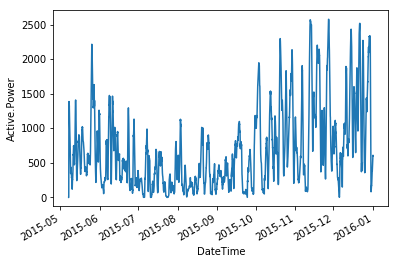

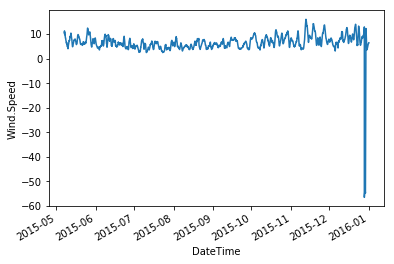

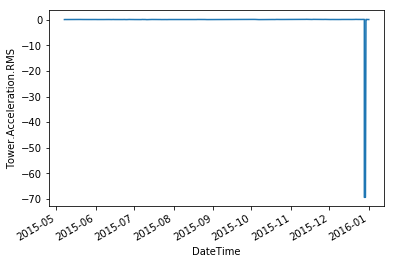

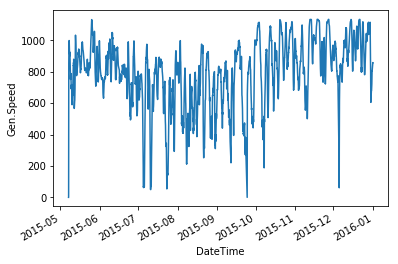

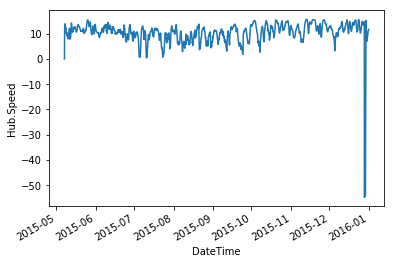

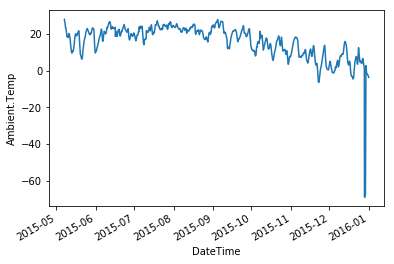

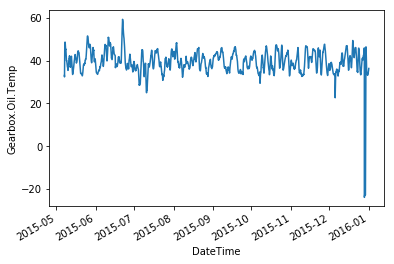

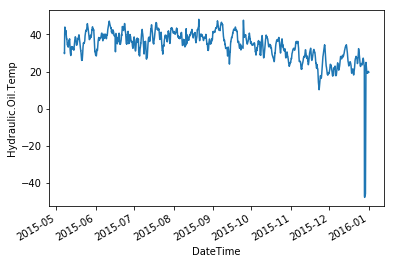

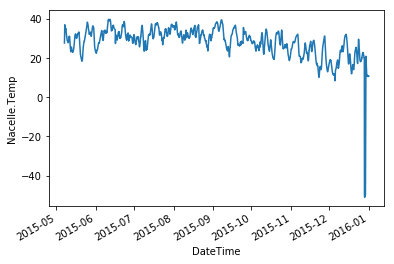

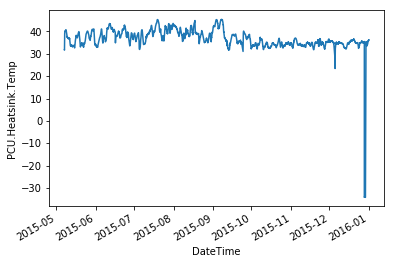

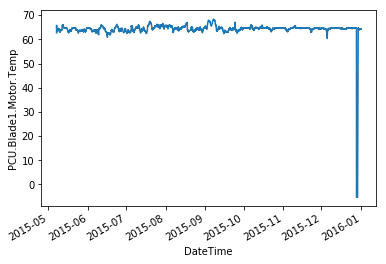

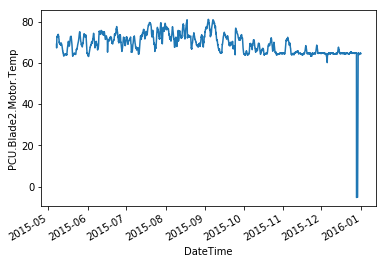

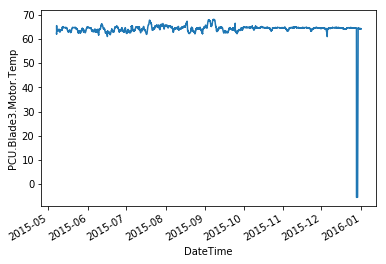

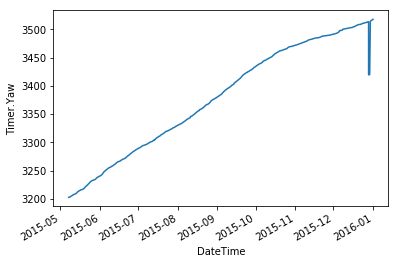

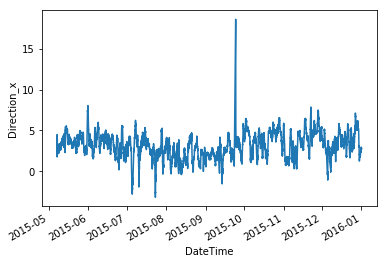

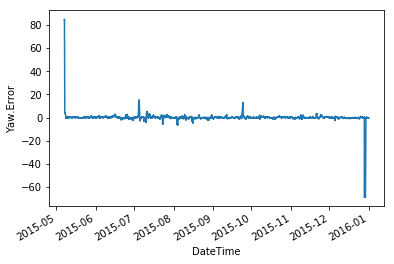

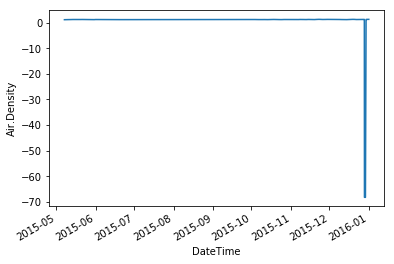

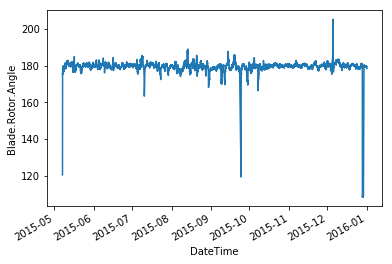

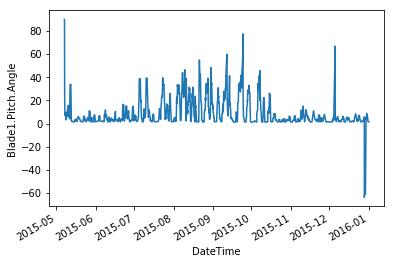

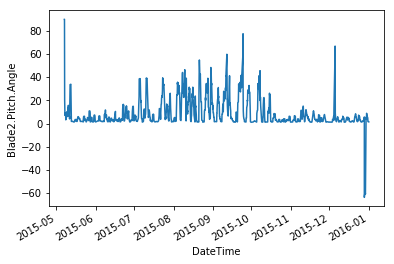

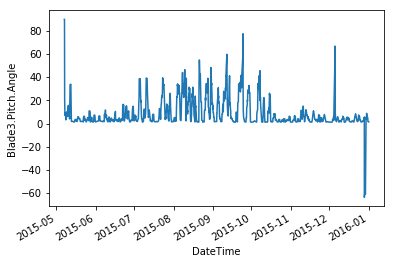

In [12]:
for i in days.columns:
    days[i].plot()
    plt.ylabel(i)
    plt.show()

In [1]:
df_Power=df_new['Active.Power'].rolling('60D').mean()
df_WindSpeed=df_new['Wind.Speed'].rolling('60D').mean()
df_Blade2PitchAngle=df_new['Blade2.Pitch.Angle'].rolling('60D').mean()
df_PCUBlade2MotorTemp=df_new['PCU.Blade2.Motor.Temp'].rolling('60D').mean()
df_AmbientTemp=df_new['Ambient.Temp'].rolling('60D').mean()

NameError: name 'df_new' is not defined

In [2]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
axes[0].plot(df_WindSpeed,df_Power)
axes[0].set(xlabel='WindSpeed')
axes[0].set(ylabel='Power')
axes[1].plot(df_Blade2PitchAngle,df_Power)
axes[1].set(xlabel='PitchAngle')
axes[1].set(ylabel='Active.Power')
axes[2].plot(df_AmbientTemp,df_Power)
axes[2].set(xlabel='AmbientTemp')
axes[2].set(ylabel='Active.Power')

NameError: name 'plt' is not defined